In [67]:
import networkx as nx
from functions import *
import matplotlib.pyplot as plt

In [68]:
foldername = '../data/Official_HSK/'
from_level = 1
to_level = 1
filenames = create_filename_list(foldername=foldername, from_level=from_level, to_level=to_level)

In [69]:
list_of_all_words = []
for filename in filenames:
    list_of_all_words += csv_to_list_of_words(filename)

In [70]:
graph = nx.Graph()
for w in list_of_all_words:
    if len(w.chinese) == 2 and w.chinese[0] != w.chinese[1]:
        graph.add_edge(w.chinese[0].encode('utf8').decode('utf8'), w.chinese[1].encode('utf8').decode('utf8'))

print(graph.number_of_nodes())

212


In [71]:
labels = {i: n for i, n in enumerate(graph.nodes())}
mapping = {n: i for i, n in enumerate(graph.nodes())}

nx.relabel_nodes(graph, mapping, copy=False)

graphviz layouts are typically more nice-looking, but you can use networkx, if there is no graphviz on your computer. Graphviz layout options are 'neato', 'dot', 'twopi', 'fdp', 'circo'.

In [72]:
graphviz_option = 'twopi'
pos = nx.nx_pydot.graphviz_layout(graph, prog='C:\Program Files\Graphviz/bin/' + graphviz_option + '.exe')
# pos = nx.spring_layout(graph)


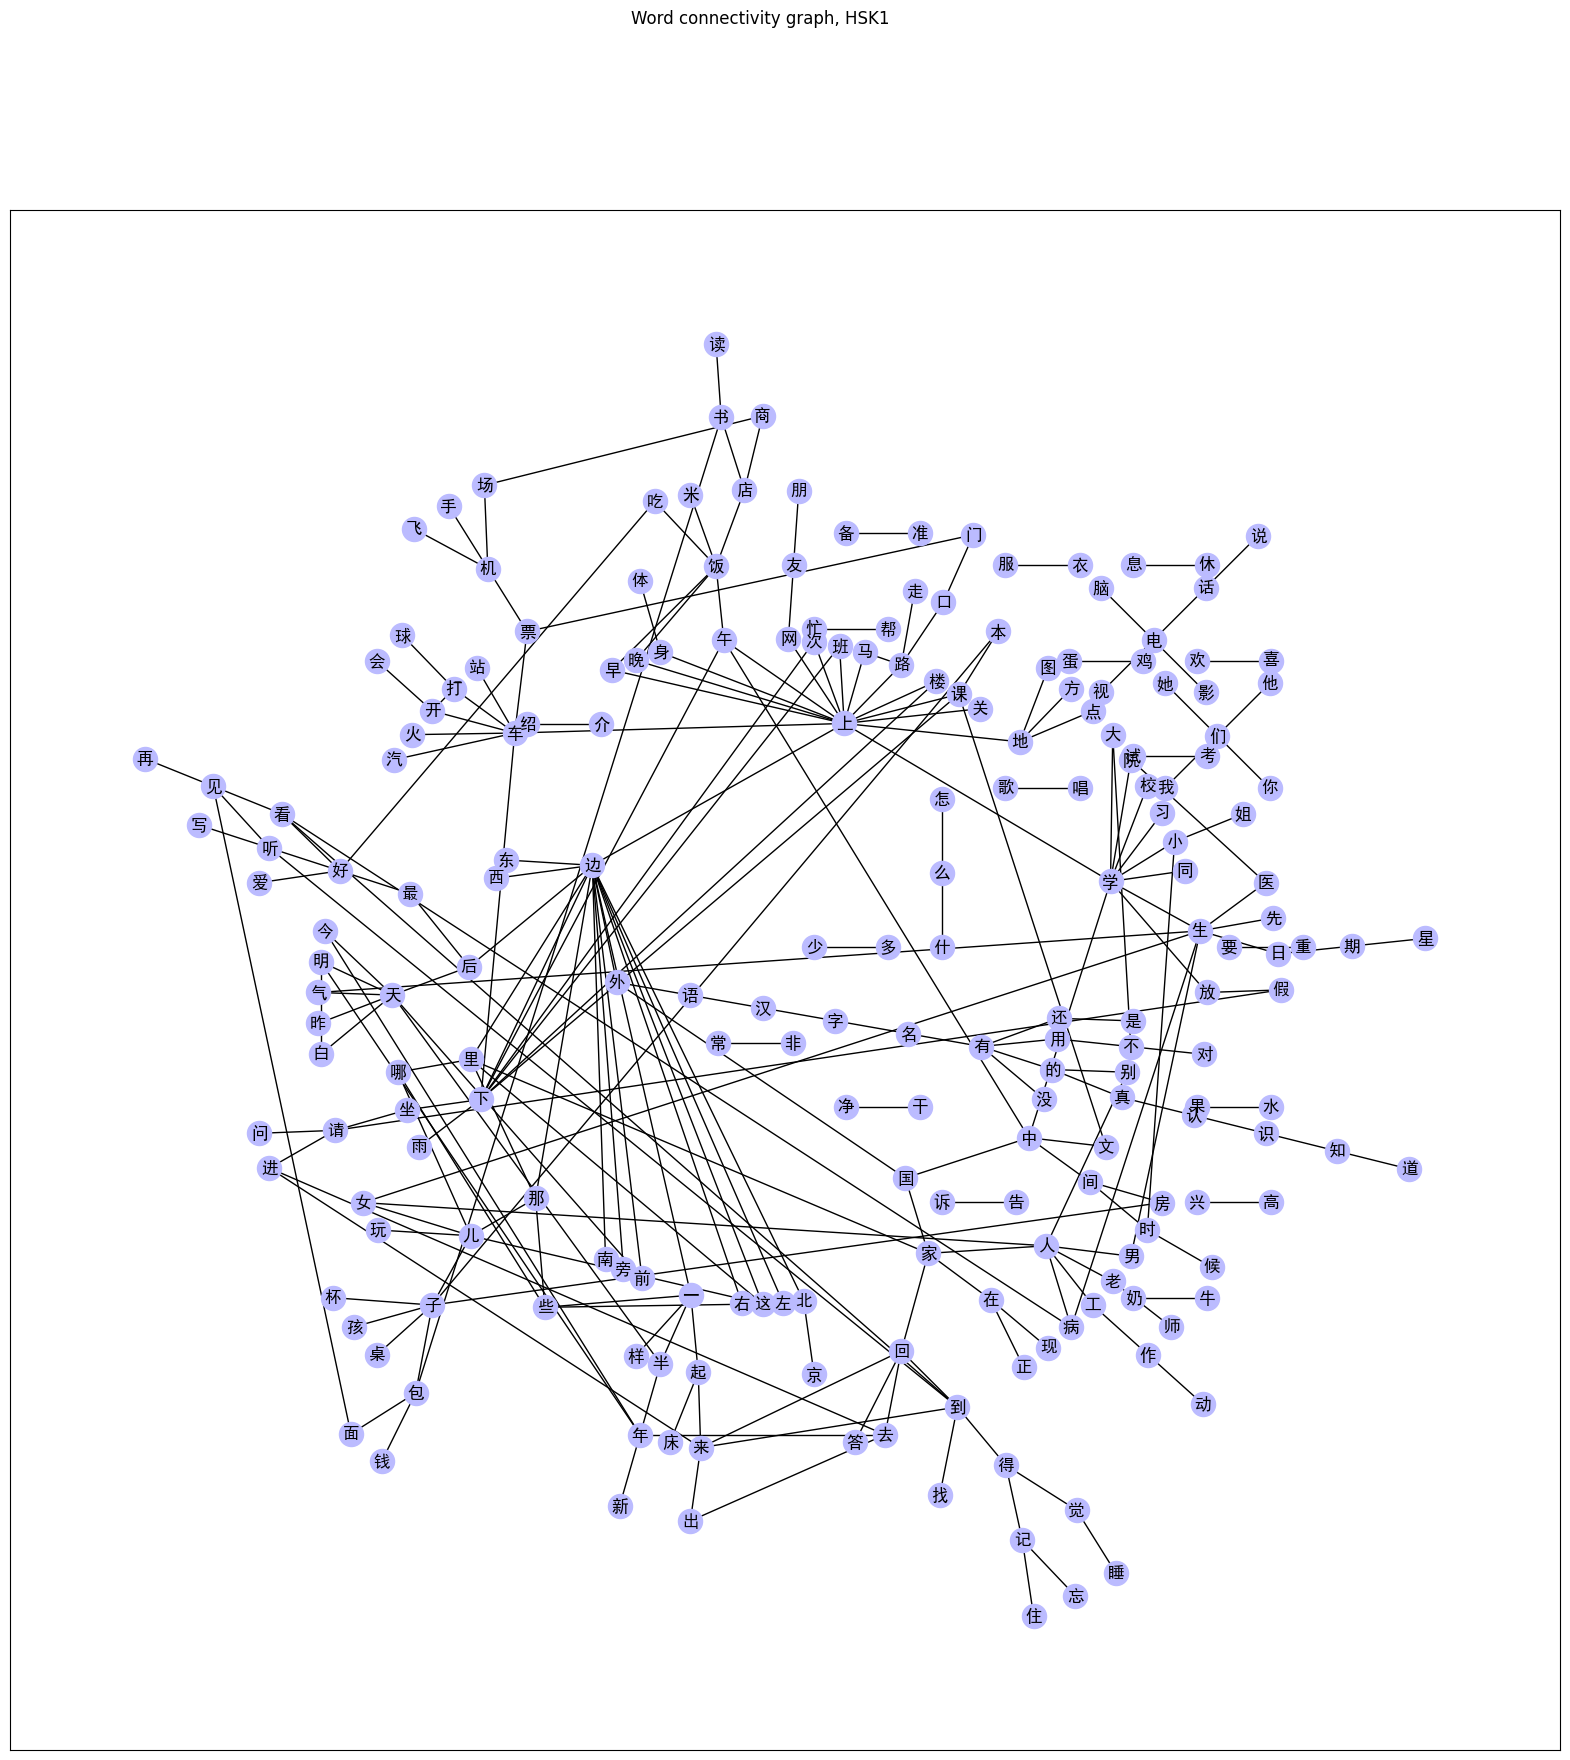

In [73]:
fig = plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(graph, pos=pos, node_color='#bbbbff')
nx.draw_networkx_edges(graph, pos=pos)
nx.draw_networkx_labels(graph, pos=pos, labels=labels, font_family='SimHei')
fig.suptitle('Word connectivity graph, HSK1')
plt.savefig('graph.png', dpi=300)